tfidf

In [8]:
df_jobads['processed_job_description'] = df_jobads['job_description'].apply(preprocess_text)

df_jobads.head(2)

,job_description,label,label_encoded,processed_job_description
0,silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...
1,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...


In [9]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_jobads['processed_job_description'], df_jobads['label_encoded'], test_size=0.3, random_state=630)
print('TOTAL shape:', df_jobads.shape)
print('TRAINING shape:', X_train.shape)
print('TEST shape:', X_test.shape)

TOTAL shape: (1166, 4)
TRAINING shape: (816,)
TEST shape: (350,)


In [10]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [12]:
X_train_combined = hstack([X_train_bow, X_train_tfidf])
X_test_combined = hstack([X_test_bow, X_test_tfidf])

logistic regression

In [13]:
# Classifier - Using Logistic Regression original approach
clf = LogisticRegression(max_iter=1000, class_weight='balanced')  # Increased max_iter for convergence

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: LOGISTIC REGRESSION (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.92      0.96        49
           2       0.98      0.99      0.99       119

    accuracy                           0.99       350
   macro avg       0.99      0.97      0.98       350
weighted avg       0.99      0.99      0.99       350



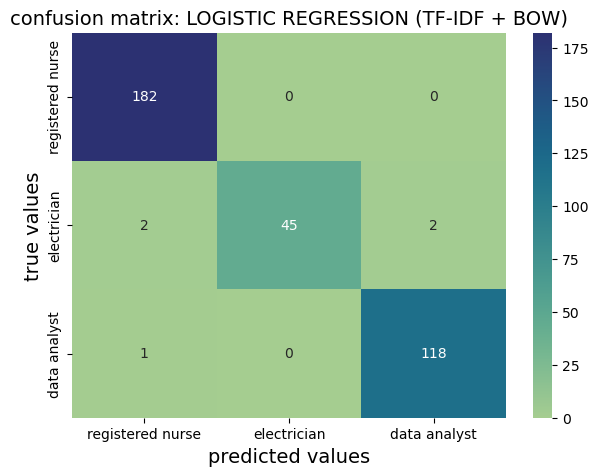

In [14]:
print('classification report: LOGISTIC REGRESSION (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: LOGISTIC REGRESSION (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()

In [21]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [22]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [23]:
X_train_combined = hstack([X_train_bow, X_train_tfidf])
X_test_combined = hstack([X_test_bow, X_test_tfidf])

In [24]:
# Classifier - Using Logistic Regression
clf = LogisticRegression(max_iter=1000, class_weight='balanced')  # Increased max_iter for convergence

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: LOGISTIC REGRESSION (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1900
           1       0.88      0.89      0.88      1900
           2       0.96      0.97      0.96      1900
           3       0.92      0.91      0.91      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



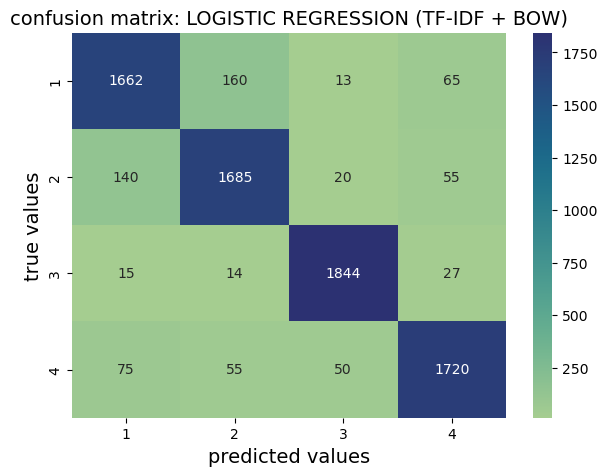

In [25]:
print('classification report: LOGISTIC REGRESSION (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['1', '2', '3', '4']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: LOGISTIC REGRESSION (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()